# Realtime plots of running code
March 30, 2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

import subprocess as sp

## Run the code 
Can do this in a separate terminal as well

In [2]:
cmd='make \n ./torus_md'
print(cmd)

make 
 ./torus_md


In [3]:
op=sp.check_output(cmd,shell=True)
print(op)

torus_md.cpp:38:11: warning: unused variable 'R_skin' [-Wunused-variable]
  double  R_skin = 4.0;
          ^
torus_md.cpp:37:10: warning: unused variable 'R_cut' [-Wunused-variable]
  double R_cut = 2.0;
         ^
2 warnings generated.


b'c++ -g -Wall   -c -o torus_md.o torus_md.cpp\ng++ -g -Wall  torus_md.o   -o torus_md\n'


## Plot the solution from saved file, as code runs.

Reads data from file. 

Data must be in the form : x1,y1\tx2,y2\tx3,y3...xn,yn\n format

i.e. x,y for each point separated by \t with new line at the end.

In [32]:
def f_plot_realtime(op_file,first=0,last=50,step=1,pause=1,last_only=False):
    '''
    num= Number of plots you want
    pause=time before it loads next dataset
    last_only= True implies it will only plot the last line of the file
    
    '''
    
    plt.rcParams["figure.figsize"]=(4,4)
    for i in range(first,last,step):
        # Read file. Do this each time so that update of file by the code can be taken into account
        with open(op_file,'r') as f:
            lst=f.readlines()
        
        print(len(lst))
        if last_only: idx=-1 ## Plot just the last entry of the file
        else: idx=i
        
        total=len(lst)
        if idx>=total: break

        ## Pick selected iteration from file
        arr=np.array([ii.split(',') for ii in lst[idx].split('\t')][:-1],dtype=np.float64)
        clear_output(wait=True)  
        plt.title('Iteration={0}'.format(idx))
        x=arr[:,0]
        y=arr[:,1]
        # print(x.shape,y.shape)
        L=x.shape[0]
        plt.scatter(x,y,marker='o',s=100)
        # plt.xlim(0,L,2)
        # plt.ylim(0,L,2)
        plt.pause(pause)
        plt.draw()


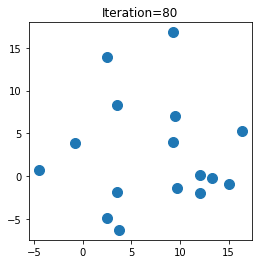

<Figure size 288x288 with 0 Axes>

In [33]:
ans=f_plot_realtime(op_file='op.out',first=0,last=81,step=20,pause=1,last_only=False)

In [9]:
? plt.scatter

Signature:
 plt.scatter(
    x,
    y,
    s=None,
    c=None,
    marker=None,
    cmap=None,
    norm=None,
    vmin=None,
    vmax=None,
    alpha=None,
    linewidths=None,
    *,
    edgecolors=None,
    plotnonfinite=False,
    data=None,
    **kwargs,
)
Docstring:
A scatter plot of *y* vs. *x* with varying marker size and/or color.

Parameters
----------
x, y : float or array-like, shape (n, )
    The data positions.

s : float or array-like, shape (n, ), optional
    The marker size in points**2.
    Default is ``rcParams['lines.markersize'] ** 2``.

c : array-like or list of colors or color, optional
    The marker colors. Possible values:

    - A scalar or sequence of n numbers to be mapped to colors using
      *cmap* and *norm*.
    - A 2D array in which the rows are RGB or RGBA.
    - A sequence of colors of length n.
    - A single color format string.

    Note that *c* should not be a single numeric RGB or RGBA sequence
    because that is indistinguishable from an arr